# bộ lọc KG và TS butterwoth highpass

<>:6: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Home\AppData\Local\Temp\ipykernel_21340\4067057343.py:6: SyntaxWarning: invalid escape sequence '\I'
  img = Image.open('C:\ImageProcessing\Doan-xulyanh\img\pumpkin.png').convert("L")


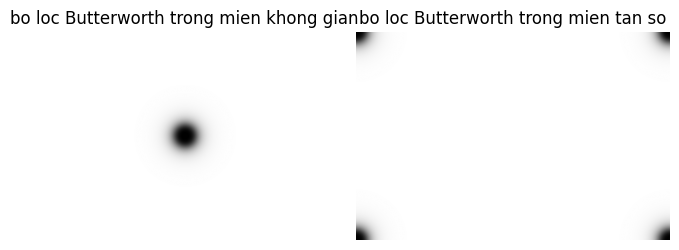

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1 doc anh goc
img = Image.open('C:\ImageProcessing\Doan-xulyanh\img\pumpkin.png').convert("L")
f = np.array(img)
P, Q = f.shape

# 2 tao bo loc thong cao Butterworth
D0 = 30     # tan so cat
n = 2       # cap cua bo loc

h = np.zeros((P, Q))
for i in range(P):
    for j in range(Q):
        D = np.sqrt((i - P/2)**2 + (j - Q/2)**2)
        if D == 0:
            h[i, j] = 0
        else:
            h[i, j] = 1 / (1 + (D0 / D)**(2 * n))

# dich tam bo loc ve giua
H = np.fft.fftshift(h)

# 3 bien doi Fourier anh va ap bo loc
F = np.fft.fft2(f)
F_shift = np.fft.fftshift(F)
G = H * F_shift

# 4 bien doi nguoc de lay anh sau loc
G_ishift = np.fft.ifftshift(G)
filtered_img = np.abs(np.fft.ifft2(G_ishift))

# 5 hien thi ket qua
plt.figure(figsize=(10, 6))

# bo loc trong mien khong gian
plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.title("bo loc Butterworth trong mien khong gian")
plt.axis('off')

# bo loc trong mien tan so
plt.subplot(1, 3, 2)
plt.imshow(H, cmap='gray')
plt.title("bo loc Butterworth trong mien tan so")
plt.axis('off')


plt.tight_layout()
plt.show()
